<a href="https://colab.research.google.com/github/manojt5/Machine_Learning_Practice_FCC/blob/main/MAGIC_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##start


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [32]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [33]:
df["class"]=(df["class"]=="g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


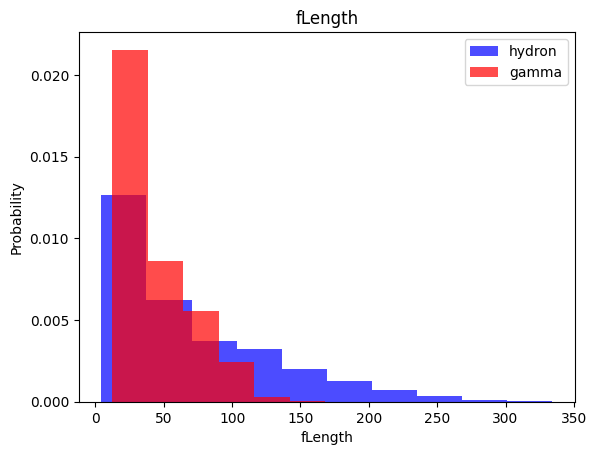

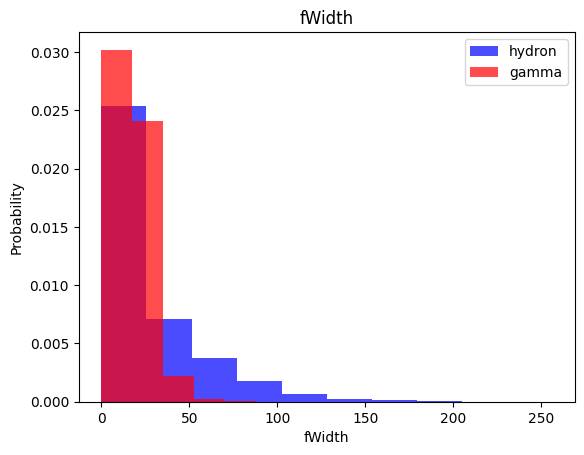

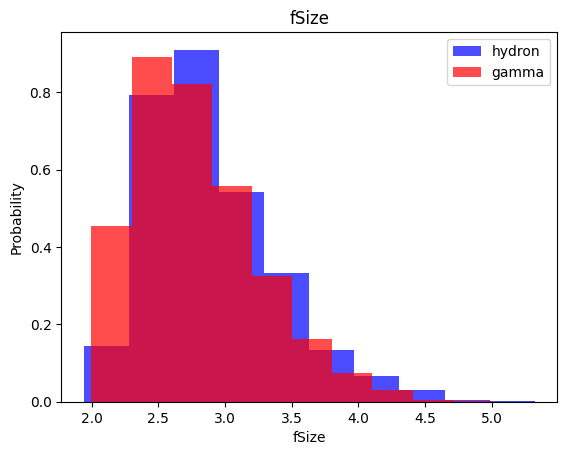

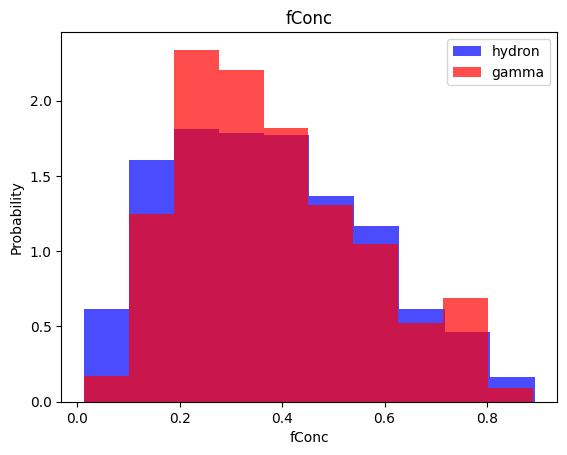

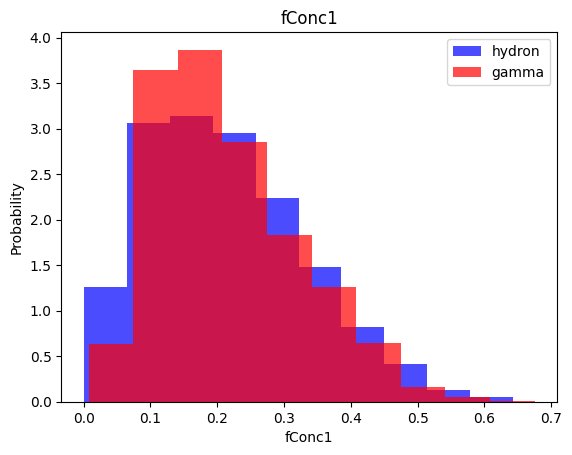

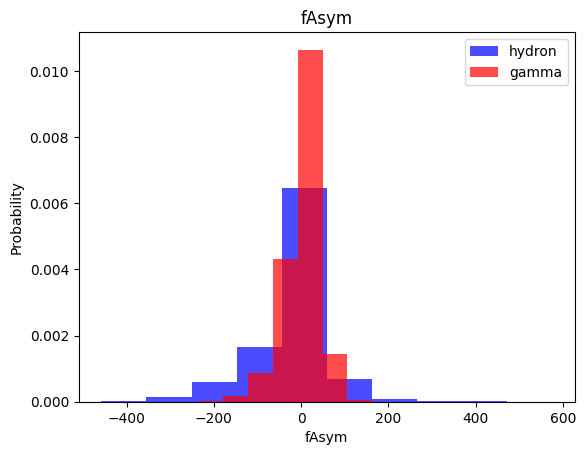

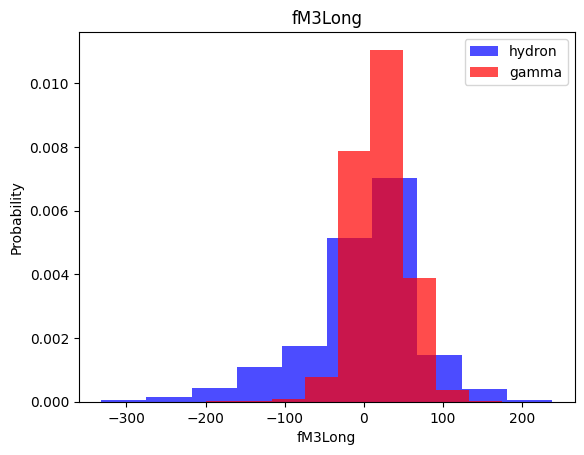

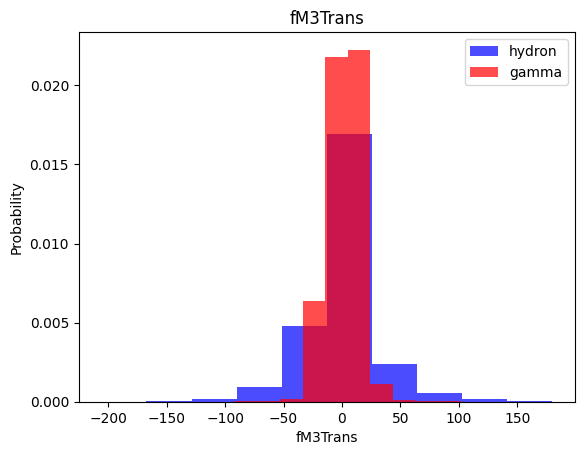

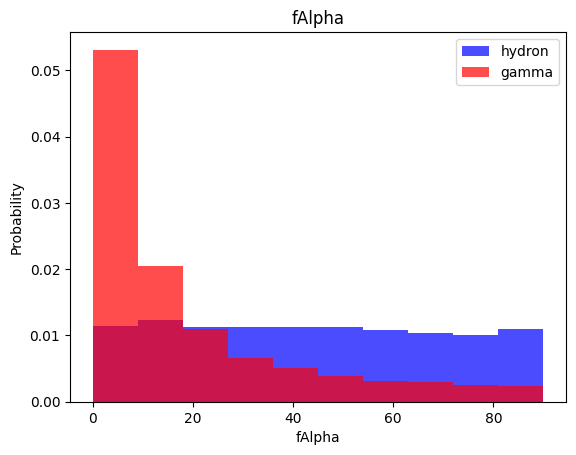

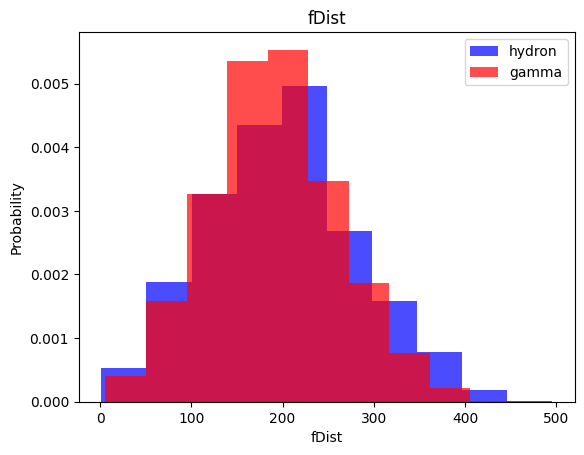

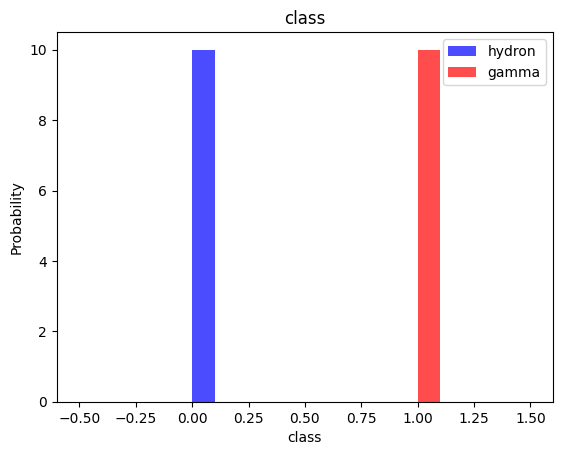

In [34]:
for label in cols:
  plt.hist(df[df["class"]==0][label],color="blue",density=True,label="hydron",alpha=0.7)
  plt.hist(df[df["class"]==1][label],color="red",density=True,label="gamma",alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()


In [35]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [36]:
def scale_dataset(dataframe,oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler();
  X=scaler.fit_transform(X);

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))
  return data,X,y


In [37]:
print(len(train[train["class"]==0]))
len(train[train["class"]==1])


4003


7409

In [38]:
train,xtrain,ytrain=scale_dataset(train,oversample=True)
valid,xvalid,yvalid=scale_dataset(valid,oversample=False)
test,xtest,ytest=scale_dataset(test,oversample=False)


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [40]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [41]:
y_pred=knn_model.predict(xtest)

In [42]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1344
           1       0.85      0.87      0.86      2460

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb_model=GaussianNB()
nb_model=nb_model.fit(xtrain,ytrain)

In [45]:
y_pred=nb_model.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1344
           1       0.73      0.89      0.81      2460

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(xtrain,ytrain)

In [48]:
y_pred=lg_model.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1344
           1       0.84      0.82      0.83      2460

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



#SVM

In [51]:
from sklearn.svm import SVC

In [52]:
svc_model=SVC()
svc_model=svc_model.fit(xtrain,ytrain)

In [53]:
ypred=svc_model.predict(xtest)
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1303
           1       0.91      0.89      0.90      2501

    accuracy                           0.87      3804
   macro avg       0.85      0.86      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary cossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
#plot_loss(history)

In [ ]:
def train_model(xtarin,ytrain,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation="sigmoid")
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(
    xtrain,ytrain,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
  )
  return nn_model,history

In [ ]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes,dropout_prob:{dropout_prob},lr:{lr},batch_size:{batch_size}")
        model,history=train_model(xtrain,ytrain,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_loss(history)
        val_loss=model.evaluate(xvalid,yvalid)[0]
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model


In [ ]:
y_pred=least_loss_model.predict(xtest)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
#print(y_pred)
print(classification_report(ytest,y_pred))